In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import emoji
import seaborn as sns

In [2]:
df = pd.read_csv("Data/cleaned_by_language.csv")

In [3]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

### Create Corpus

In [4]:
en_corpus = en_df['text'].tolist()
es_corpus = es_df['text'].tolist()

### Create Emoji Set

In [5]:
emoji_list = df['emoji list'].tolist()

emoji_list = list(itertools.chain.from_iterable(emoji_list))
delete = {"'","\"", " ", "[", "]", ","}
new_emoji_list = []

for ele in emoji_list:
    if ele not in delete:
        new_emoji_list.append(ele)
        
emoji_set = set(new_emoji_list)

### TF-IDF for English Comments

In [6]:
# tf: emoji occurance / word count+emoji count
en_docs = len(en_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

en_word = en_df['word count'].tolist()
en_emoji = en_df['emoji count'].tolist()
en_counts = [en_word[i] + en_emoji[i] for i in range(len(en_word))] # Number of word_emoji count in the comment

emoji = en_df['emoji list'].tolist()
 
en_df_tf = pd.DataFrame(np.zeros((en_docs, n_emoji_set)), columns=emoji_set)
 
# Compute Term Frequency (TF)
for i in range(en_docs):
    for e in emoji[i]:
        if e not in emoji_set:
            continue
        en_df_tf[e][i] = en_df_tf[e][i] + (1 / (en_counts[i]))
         
en_df_tf
# en_df_tf['😂'].head(20)

,🥂,👻,🤫,😮,💛,❤,🥅,😆,🔴,🤪,...,U,✨,🥲,😠,🛫,🔥,🏽,🍳,😄,😒
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.043478,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [7]:
#idf
en_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(en_docs):
        if w in emoji[i]:
            k += 1
             
    en_idf[w] =  np.log10(en_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {en_idf[w]:>10}' )

              🥂: 2.4471580313422194
              👻: 2.4471580313422194
              🤫: 1.7481880270062005
              😮: 1.9700367766225568
              💛: 1.845098040014257
              ❤: 0.8450980400142568
              🥅: 2.4471580313422194
              😆: 1.9700367766225568
              🔴: 2.4471580313422194
              🤪: 1.9700367766225568
              ♀: 2.146128035678238
              🏃: 1.9700367766225568
              😊: 1.7481880270062005
              🤐: 2.146128035678238
              🤍: 1.7481880270062005
              😜: 2.4471580313422194
              6: 2.146128035678238
              😞: 2.4471580313422194
              💕: 2.4471580313422194
              😣: 2.146128035678238
              🤷: 1.9700367766225568
              👏:        1.0
              🚶: 2.146128035678238
              🏴: 2.146128035678238
              ⭐: 2.4471580313422194
              🤟: 2.146128035678238
              😐: 2.146128035678238
              🏳: 1.9700367766225568
         

In [8]:
# compute TF-idf
en_df_tf_idf = en_df_tf.copy()
 
for w in emoji_set:
    for i in range(en_docs):
        en_df_tf_idf[w][i] = en_df_tf[w][i] * en_idf[w]
         
en_df_tf_idf

,🥂,👻,🤫,😮,💛,❤,🥅,😆,🔴,🤪,...,U,✨,🥲,😠,🛫,🔥,🏽,🍳,😄,😒
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.263585,0.120728,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.036743,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.000000,0.076827,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### TF-IDF for Spanish Comments

In [9]:
# tf: emoji occurance / word count+emoji count
es_docs = len(es_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

es_word = es_df['word count'].tolist()
es_emoji = es_df['emoji count'].tolist()
es_counts = [es_word[i] + es_emoji[i] for i in range(len(es_word))] # Number of word_emoji count in the comment

es_emoji = es_df['emoji list'].tolist()
 
es_df_tf = pd.DataFrame(np.zeros((es_docs, n_emoji_set)), columns=emoji_set)
 
# Compute Term Frequency (TF)
for i in range(es_docs):
    for e in es_emoji[i]:
        if e not in emoji_set:
            continue
        es_df_tf[e][i] = es_df_tf[e][i] + (1 / (es_counts[i]))
         
es_df_tf

,🥂,👻,🤫,😮,💛,❤,🥅,😆,🔴,🤪,...,U,✨,🥲,😠,🛫,🔥,🏽,🍳,😄,😒
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [10]:
#idf
es_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(es_docs):
        if w in es_emoji[i]:
            k += 1
             
    es_idf[w] =  np.log10(es_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {es_idf[w]:>10}' )

              🥂: 2.146128035678238
              👻: 2.146128035678238
              🤫: 1.7481880270062005
              😮: 2.146128035678238
              💛: 2.146128035678238
              ❤: 0.7939455175668756
              🥅: 2.146128035678238
              😆: 2.4471580313422194
              🔴: 2.146128035678238
              🤪: 2.4471580313422194
              ♀: 2.146128035678238
              🏃: 2.4471580313422194
              😊: 2.4471580313422194
              🤐: 2.146128035678238
              🤍: 1.9700367766225568
              😜: 2.146128035678238
              6: 1.9700367766225568
              😞: 2.146128035678238
              💕: 2.146128035678238
              😣: 2.4471580313422194
              🤷: 1.7481880270062005
              👏: 1.0321846833714012
              🚶: 2.4471580313422194
              🏴: 2.4471580313422194
              ⭐: 2.146128035678238
              🤟: 2.4471580313422194
              😐: 2.4471580313422194
              🏳: 2.146128035678238
     

In [11]:
# compute TF-idf
es_df_tf_idf = es_df_tf.copy()
 
for w in emoji_set:
    for i in range(es_docs):
        es_df_tf_idf[w][i] = es_df_tf[w][i] * es_idf[w]
         
es_df_tf_idf

,🥂,👻,🤫,😮,💛,❤,🥅,😆,🔴,🤪,...,U,✨,🥲,😠,🛫,🔥,🏽,🍳,😄,😒
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.158789,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.195103,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.433687,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.096375,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.000000,0.0,0.529297,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Comparison

In [12]:
en_sums = en_df_tf_idf.sum()

top_20_en = en_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in English:")
print(top_20_en)

Top 20 TF-IDF in English:
😂    8.339352
🔥    6.102073
👏    5.992352
❤    5.384984
🤣    5.270205
😍    4.167649
0    2.736895
😢    2.012392
🤬    1.995294
🙌    1.872619
🏆    1.784451
1    1.527331
😅    1.519650
🤫    1.432543
☕    1.361116
💀    1.264875
😉    1.089736
✨    1.072463
🐐    1.050994
f    1.004553
dtype: float64


In [13]:
es_sums = es_df_tf_idf.sum()

top_20_es = es_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in Spanish:")
print(top_20_es)

Top 20 TF-IDF in Spanish:
😂    9.261282
🔥    8.832354
❤    8.418971
👏    6.081236
😍    6.019559
🙌    4.128326
😢    3.443874
💙    2.275662
0    1.779406
🤫    1.760328
🏻    1.573255
💰    1.430752
🤣    1.411559
🤏    1.387980
⚽    1.353031
💔    1.341330
👑    1.199314
😁    1.192293
🏼    1.155226
🙏    1.129051
dtype: float64


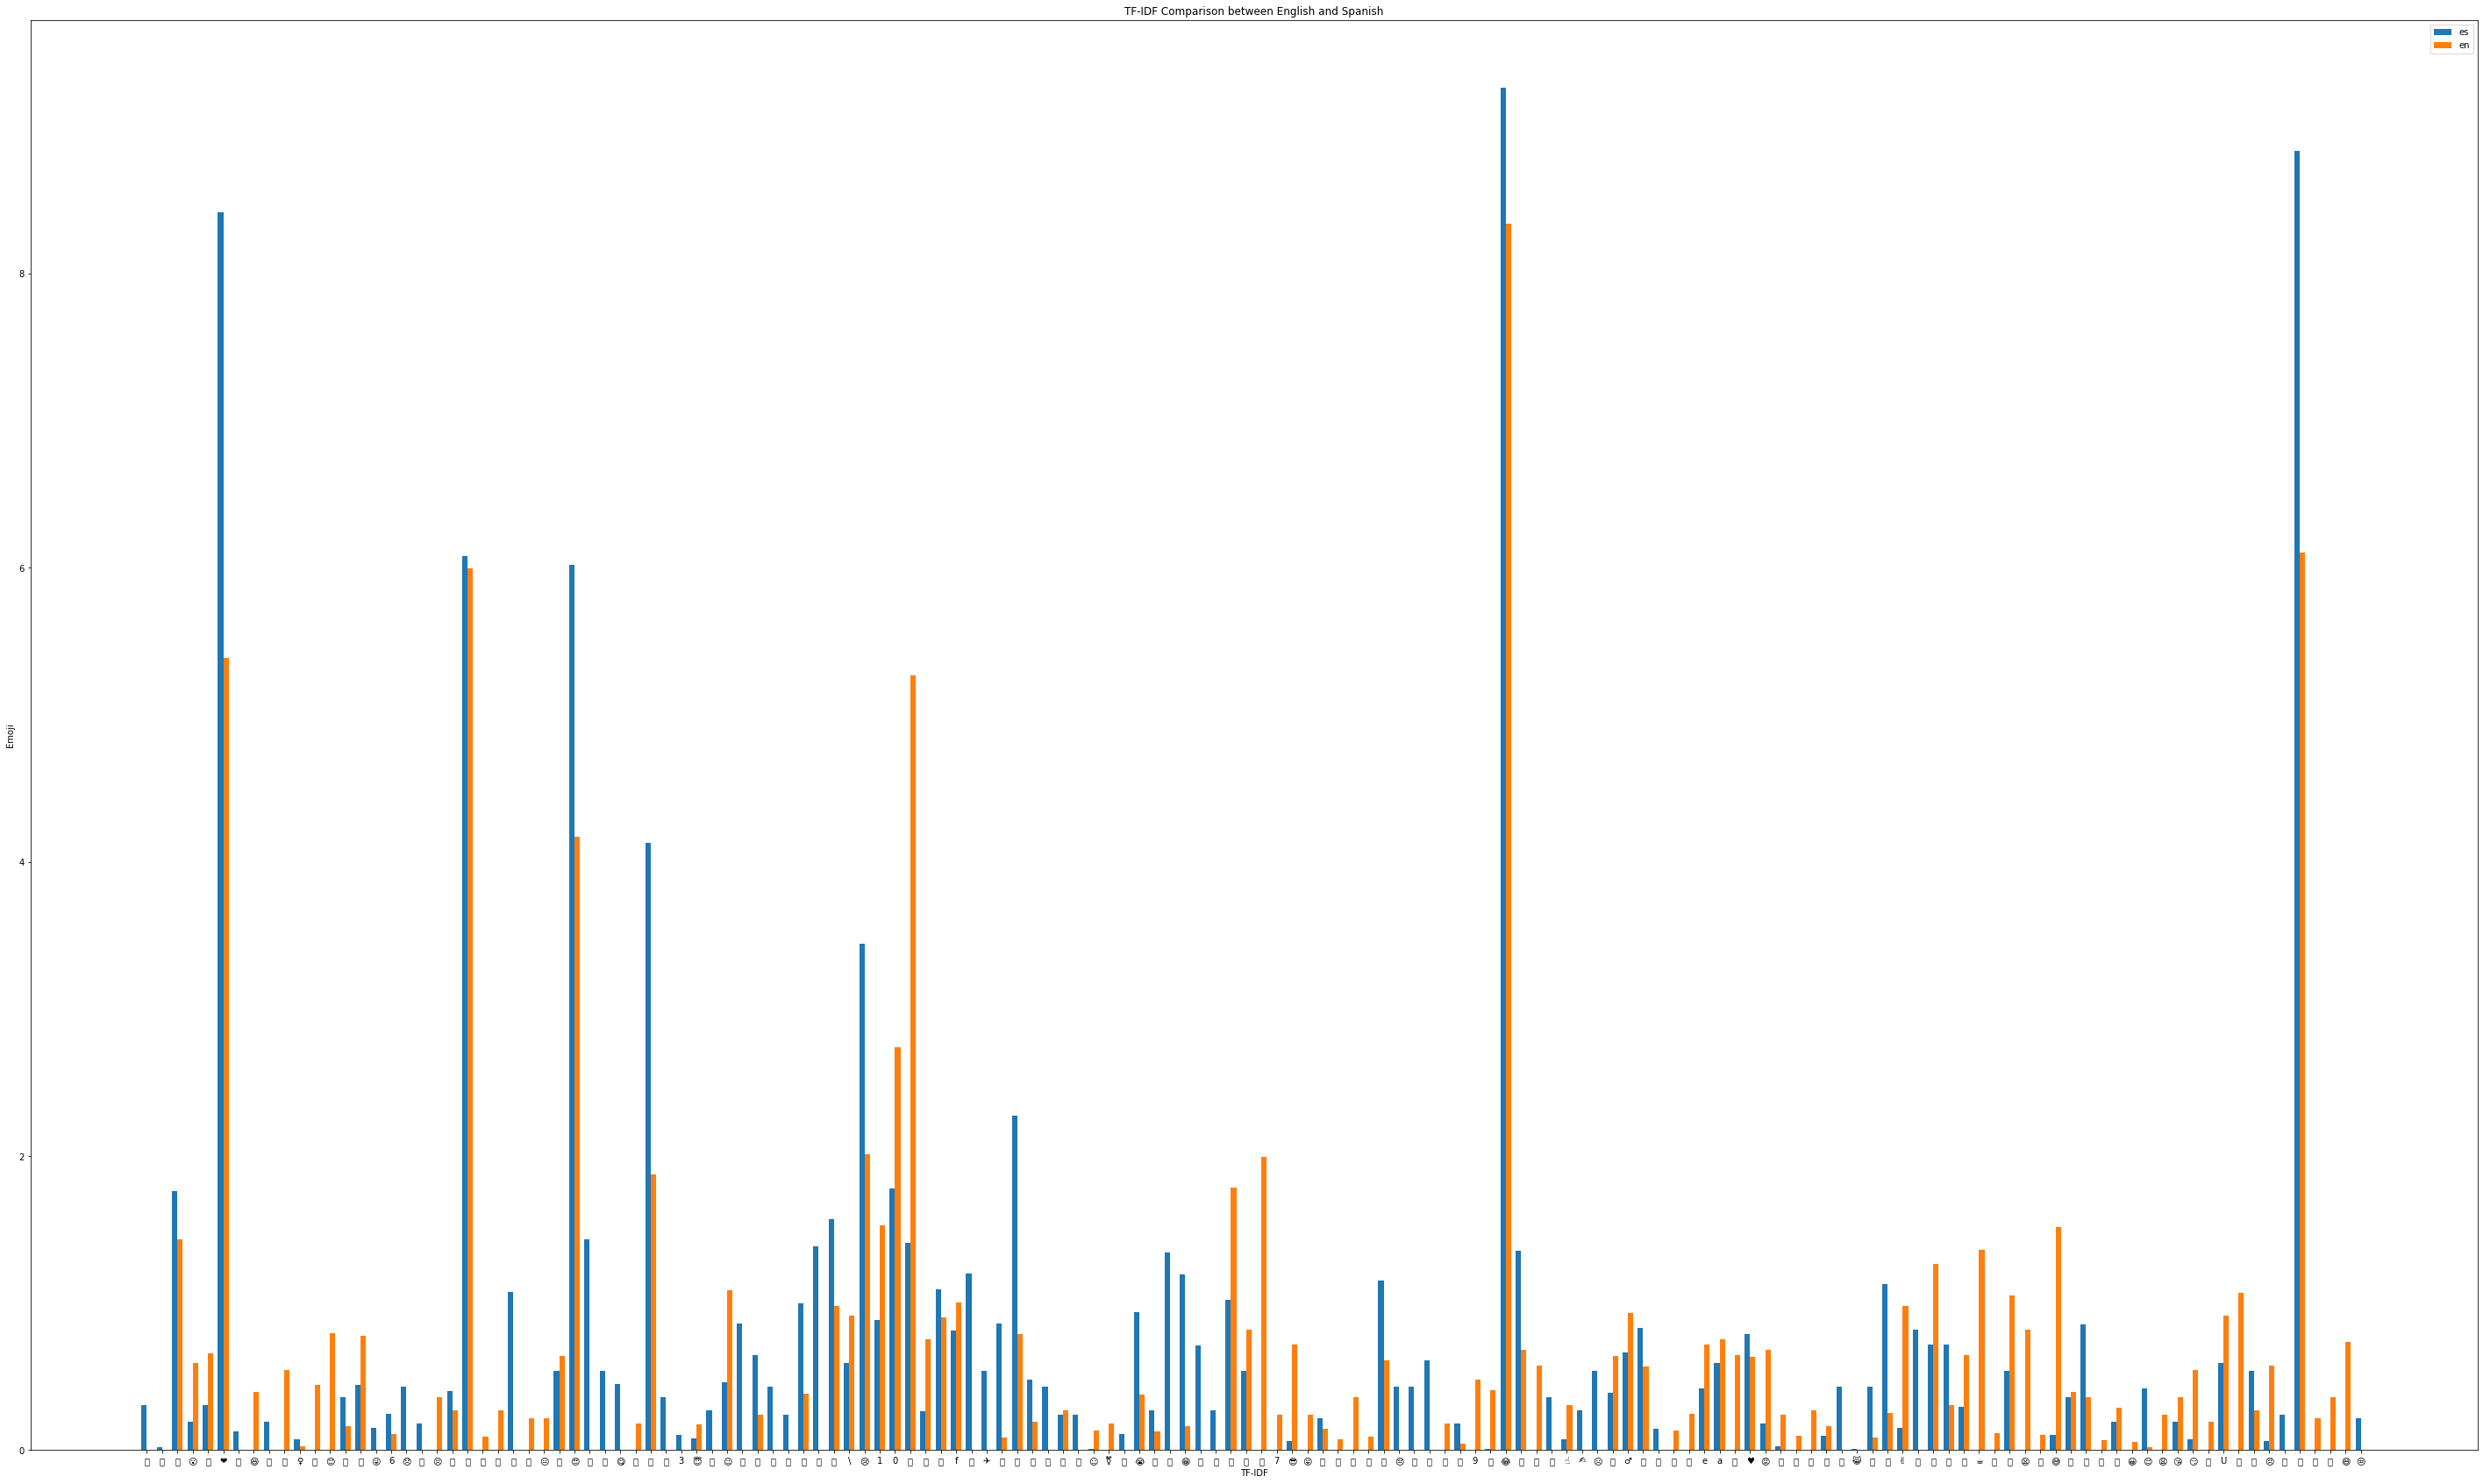

In [16]:
# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for each variable
x = np.arange(len(es_sums.index))


fig, ax = plt.subplots(figsize=(50, 30)) 
ax.bar(x - bar_width / 2, es_sums, bar_width, label='es', align='center')
ax.bar(x + bar_width / 2, en_sums, bar_width, label='en', align='center')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(es_sums.index)

# Add labels, legend, and title
ax.set_xlabel('TF-IDF')
ax.set_ylabel('Emoji')
ax.set_title('TF-IDF Comparison between English and Spanish')
ax.legend()

# Show the plot
plt.show()

In [21]:
# es > en
for i in range(len(es_sums)):
    if es_sums[i] - en_sums[i] > 1:
        print(es_sums.index.tolist()[i])

❤
⭐
😍
💰
🙌
🤏
😢
👑
💙
💔
😁
🔥


In [23]:
# en > es
for i in range(len(es_sums)):
    if en_sums[i] - es_sums[i] > 1:
        print(es_sums.index.tolist()[i])

🤣
🤬
☕
😅
✨
